<a href="https://colab.research.google.com/github/jrodriguezzuloaga-netizen/Model-based-decision-making/blob/main/Ant_Interaction_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns

# Set matplotlib to display plots inline
%matplotlib inline

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")



In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
import networkx as nx
import pandas as pd

# Upload the file
uploaded = files.upload()

# Extract the filename from the uploaded dict
filename = list(uploaded.keys())[0]

# Now read it properly
G = nx.read_graphml(filename)


# Convert to DataFrames
edges = nx.to_pandas_edgelist(G)
nodes = pd.DataFrame(dict(G.nodes(data=True))).T

# Save to CSV
edges.to_csv("edges.csv", index=False)
nodes.to_csv("nodes.csv", index=False)

# Download (optional)
files.download("edges.csv")
files.download("nodes.csv")




Saving Network_83.graphml to Network_83 (5).graphml


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

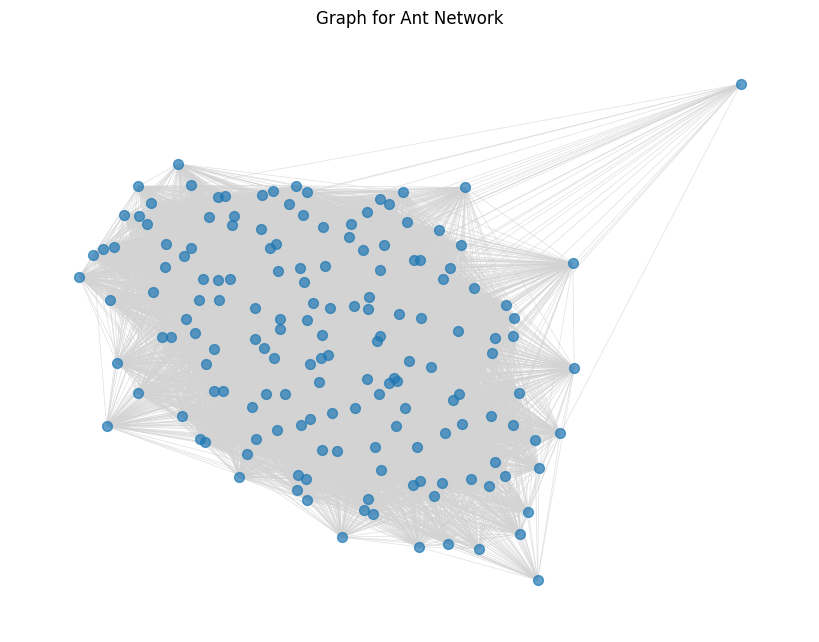

Number of nodes: 160
Number of edges: 9844


In [ ]:
import pandas as pd
import networkx as nx

# Load edge list
edges = pd.read_csv("edges.csv")

# Create the graph
G_real = nx.Graph()

# Add edges (with or without weights)
if "weight" in edges.columns:
    for _, row in edges.iterrows():
        G_real.add_edge(row["source"], row["target"], weight=row["weight"])
else:
    for _, row in edges.iterrows():
        G_real.add_edge(row["source"], row["target"])

plt.figure(figsize=(8, 6))
edge_colors = ['lightgray' for _ in G_real.edges()]
edge_widths = [0.5 for _ in G_real.edges()]
nx.draw(G_real, node_size=50, font_size=8,
        edge_color=edge_colors, width=edge_widths, alpha=0.7)
plt.title("Graph for Ant Network")
plt.show()


# Print some info about the graph
print(f"Number of nodes: {G_real.number_of_nodes()}")
print(f"Number of edges: {G_real.number_of_edges()}")

In [83]:
import networkx as nx
from google.colab import files

# Upload your .graphml file
uploaded = files.upload()

# Get the uploaded filename
filename = list(uploaded.keys())[0]

# Read the GraphML file into a NetworkX graph
G = nx.read_graphml(filename)

# (Optional) convert to a simple Graph() type (undirected, unmultiedge)
G = nx.Graph(G)

print (G.nodes)

# Check your graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is directed: {G.is_directed()}")

Saving Network_83.graphml to Network_83 (8).graphml
['Ant621', 'Ant665', 'Ant356', 'Ant118', 'Ant540', 'Ant227', 'Ant117', 'Ant111', 'Ant221', 'Ant112', 'Ant194', 'Ant196', 'Ant191', 'Ant190', 'Ant198', 'Ant518', 'Ant492', 'Ant324', 'Ant329', 'Ant650', 'Ant556', 'Ant252', 'Ant250', 'Ant251', 'Ant124', 'Ant126', 'Ant127', 'Ant26', 'Ant27', 'Ant20', 'Ant23', 'Ant28', 'Ant256', 'Ant264', 'Ant331', 'Ant313', 'Ant334', 'Ant131', 'Ant255', 'Ant560', 'Ant564', 'Ant243', 'Ant242', 'Ant245', 'Ant244', 'Ant51', 'Ant50', 'Ant53', 'Ant52', 'Ant54', 'Ant57', 'Ant59', 'Ant509', 'Ant142', 'Ant390', 'Ant308', 'Ant632', 'Ant9', 'Ant149', 'Ant278', 'Ant301', 'Ant476', 'Ant475', 'Ant380', 'Ant229', 'Ant576', 'Ant462', 'Ant115', 'Ant44', 'Ant48', 'Ant580', 'Ant398', 'Ant663', 'Ant740', 'Ant954', 'Ant263', 'Ant260', 'Ant156', 'Ant159', 'Ant158', 'Ant311', 'Ant220', 'Ant391', 'Ant673', 'Ant397', 'Ant395', 'Ant394', 'Ant4', 'Ant7', 'Ant6', 'Ant1', 'Ant0', 'Ant2', 'Ant482', 'Ant76', 'Ant137', 'Ant74', 'Ant72'

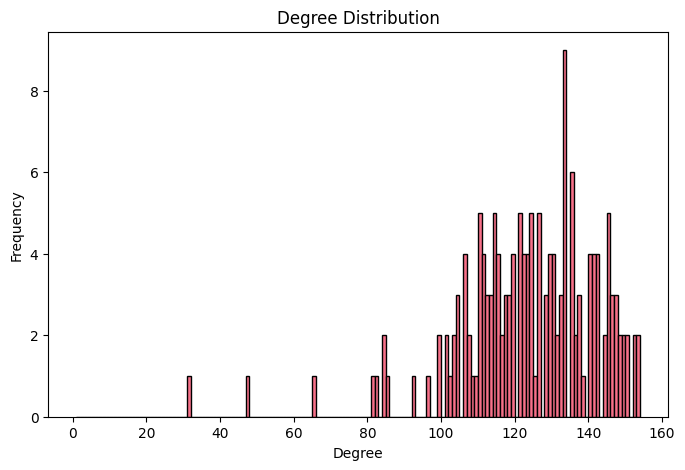

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Degree Distribution (Histogram)
degrees = [d for _, d in G.degree()]
plt.figure(figsize=(8,5))
plt.hist(degrees, bins=range(1, max(degrees)+2), edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Average Degree
avg_degree = np.mean(degrees)
print(f"Average degree: {avg_degree:.2f}")

# Density
density = nx.density(G)
print(f"Density: {density:.4f}")

# Betweenness Centrality
bet_centrality = nx.betweenness_centrality(G)
avg_betweenness = np.mean(list(bet_centrality.values()))
print(f"Average betweenness centrality: {avg_betweenness:.4f}")

# Closeness Centrality
close_centrality = nx.closeness_centrality(G)
avg_closeness = np.mean(list(close_centrality.values()))
print(f"Average closeness centrality: {avg_closeness:.4f}")

# Average Clustering Coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average clustering coefficient: {avg_clustering:.4f}")

# Average Path Length
try:
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Average path length: {avg_path_length:.4f}")
except nx.NetworkXError:
    print("Graph is not connected, can't compute path length for full graph.")

Average degree: 123.05
Density: 0.7739
Average betweenness centrality: 0.0014
Average closeness centrality: 0.8228
Average clustering coefficient: 0.8249
Average path length: 1.2261


In [84]:
import pandas as pd
import networkx as nx

# Load edges
edges = pd.read_csv("edges.csv")

# Create graph
G_real = nx.Graph()  # use nx.DiGraph() if directed

# Add edges
if "weight" in edges.columns:
    for _, row in edges.iterrows():
        G_real.add_edge(row["source"], row["target"], weight=row["weight"])
else:
    for _, row in edges.iterrows():
        G_real.add_edge(row["source"], row["target"])

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G_real)
betweenness_centrality = nx.betweenness_centrality(G_real, weight="weight")
closeness_centrality = nx.closeness_centrality(G_real)

# Create DataFrame
centrality_df = pd.DataFrame({
    "Node": list(G_real.nodes()),
    "Degree Centrality": [degree_centrality[n] for n in G_real.nodes()],
    "Betweenness Centrality": [betweenness_centrality[n] for n in G_real.nodes()],
    "Closeness Centrality": [closeness_centrality[n] for n in G_real.nodes()]
})

# Compute averages
avg_degree = centrality_df["Degree Centrality"].mean()
avg_betweenness = centrality_df["Betweenness Centrality"].mean()
avg_closeness = centrality_df["Closeness Centrality"].mean()

print("\nAverage Centrality Values")
print(f"Average Degree Centrality: {avg_degree:.4f}")
print(f"Average Betweenness Centrality: {avg_betweenness:.4f}")
print(f"Average Closeness Centrality: {avg_closeness:.4f}")



Average Centrality Values
Average Degree Centrality: 0.7739
Average Betweenness Centrality: 0.0056
Average Closeness Centrality: 0.8228


Network  Nodes  Edges  Average degree  Clustering coefficient  \
0     Real Network    160   9844        123.0500                0.824947   
1      Erdős–Rényi    160   9856        123.2000                0.775192   
2   Watts–Strogatz    160   9760        122.0000                0.771698   
3  Barabási–Albert    160   6039         75.4875                0.616017   

   Average path length  
0             1.226101  
1             1.225157  
2             1.232704  
3             1.525236

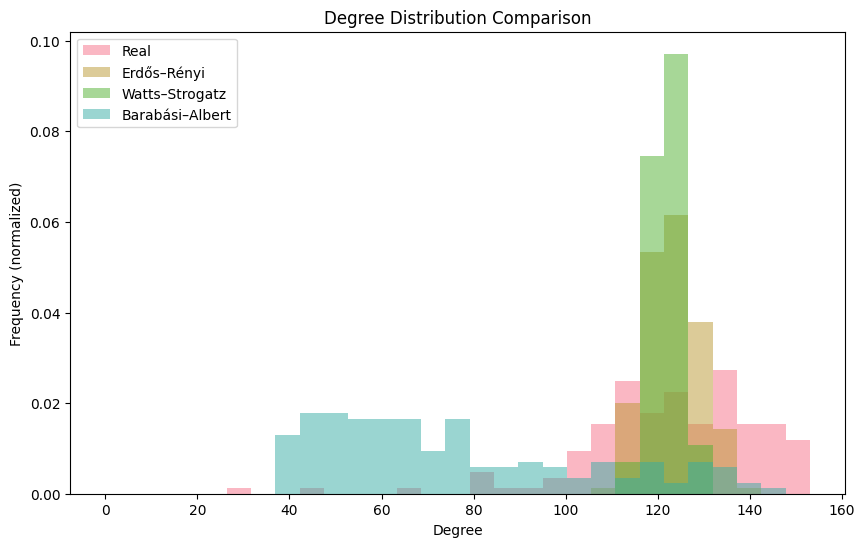

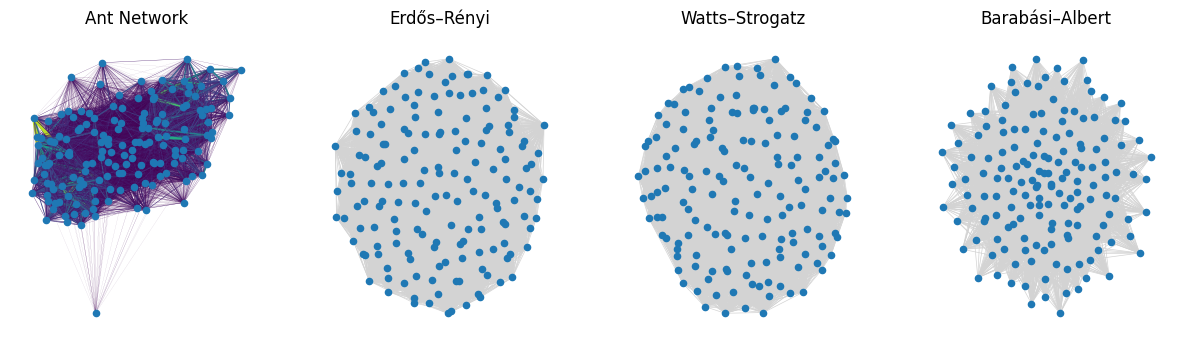

In [87]:
# Compare with Model Networks

# Insert Ant Network values
N = G.number_of_nodes()
E = G.number_of_edges()
avg_degree = 2 * E / N

# Erdős–Rényi
p = avg_degree / (N - 1)
G_er = nx.erdos_renyi_graph(N, p)

# Watts–Strogatz
k_ws = int(round(avg_degree))
p_ws = 0.1
G_ws = nx.watts_strogatz_graph(N, k_ws, p_ws)

# Barabási–Albert
m_ba = max(1, int(avg_degree / 2))
G_ba = nx.barabasi_albert_graph(N, m_ba)

# Compare statistics

def network_stats(G, name):
    degrees = [d for n, d in G.degree()]
    return {
        "Network": name,
        "Nodes": G.number_of_nodes(),
        "Edges": G.number_of_edges(),
        "Average degree": np.mean(degrees),
        "Clustering coefficient": nx.average_clustering(G),
        "Average path length": nx.average_shortest_path_length(G)
        if nx.is_connected(G)
        else np.nan,
    }

stats = pd.DataFrame([
    network_stats(G, "Real Network"),
    network_stats(G_er, "Erdős–Rényi"),
    network_stats(G_ws, "Watts–Strogatz"),
    network_stats(G_ba, "Barabási–Albert"),
])

display(stats)

# Plot degree distributions

plt.figure(figsize=(10,6))
bins = np.linspace(0, max(dict(G.degree()).values()), 30)

for graph, label in zip([G, G_er, G_ws, G_ba],
                        ["Real", "Erdős–Rényi", "Watts–Strogatz", "Barabási–Albert"]):
    degrees = [d for n, d in graph.degree()]
    plt.hist(degrees, bins=bins, alpha=0.5, density=True, label=label)

plt.xlabel("Degree")
plt.ylabel("Frequency (normalized)")
plt.title("Degree Distribution Comparison")
plt.legend()
plt.show()

# Create Visualizations

plt.figure(figsize=(15,4))
for i, (graph, title) in enumerate(zip(
    [G, G_er, G_ws, G_ba],
    ["Ant Network", "Erdős–Rényi", "Watts–Strogatz", "Barabási–Albert"]
)):
    plt.subplot(1, 4, i + 1)
    # Extract edge weights (if any) for color and width customization
    if any('weight' in graph[u][v] for u, v in graph.edges()):  # Check if there are any weights
        edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]

        # Normalize the edge weights for color mapping
        norm = plt.Normalize(min(edge_weights), max(edge_weights))
        edge_colors = plt.cm.viridis(norm(edge_weights))  # Use colormap for edge color

        # Set edge widths based on the weight
        edge_widths = [weight / max(edge_weights) * 3 for weight in edge_weights]  # Adjust multiplier for visibility
    else:
        # Default values if there are no edge weights
        edge_colors = ['lightgray' for _ in graph.edges()]
        edge_widths = [0.5 for _ in graph.edges()]
    nx.draw(graph, node_size=20, with_labels=False, edge_color=edge_colors, width=edge_widths)
    plt.title(title)
plt.show()

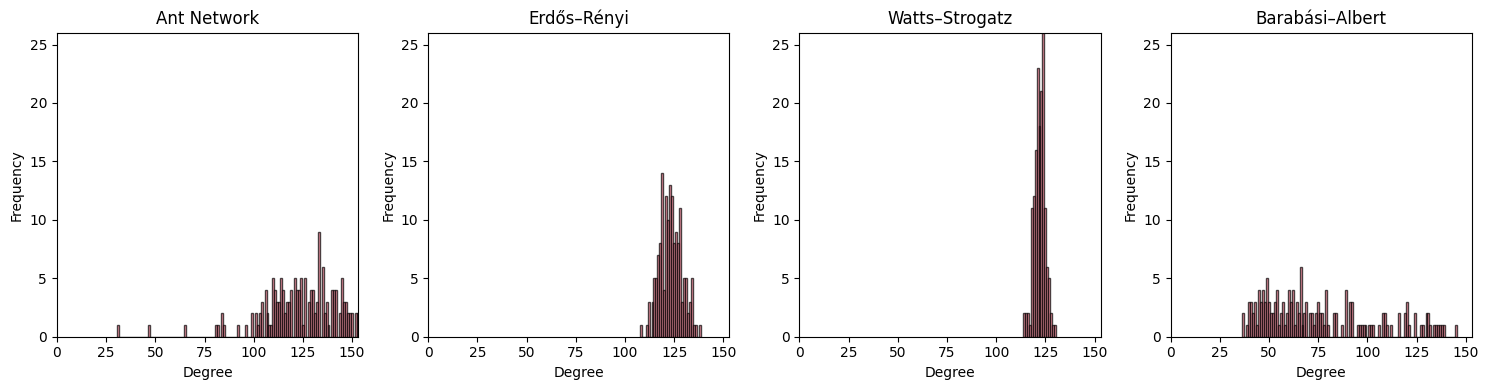

In [90]:
# Create a degree distribution plot for each network model to facilitate comparison

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# List of networks to visualize
networks = [G, G_er, G_ws, G_ba]
titles = ["Ant Network", "Erdős–Rényi", "Watts–Strogatz", "Barabási–Albert"]

# Calculate degree distributions for all graphs first
degree_data = []
max_degree = 0  # To track the overall max degree for consistent x-axis scaling
max_frequency = 0  # To track the overall max frequency for consistent y-axis scaling

for graph in networks:
    # Calculate degree of each node
    degrees = [deg for node, deg in graph.degree()]

    # Find the max degree for x-axis scaling
    max_degree = max(max_degree, max(degrees))

    # Create the degree distribution (histogram data)
    hist, bins = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 2))  # Ensures max degree is included

    # Store the degree distribution for plotting later
    degree_data.append((hist, bins))

    # Find the max frequency for y-axis scaling
    max_frequency = max(max_frequency, max(hist))

# Create a plot for each network's degree distribution
plt.figure(figsize=(15, 4))

for i, (graph, title) in enumerate(zip(networks, titles)):
    plt.subplot(1, 4, i+1)

    # Extract the histogram and bin data
    hist, bins = degree_data[i]

    # Plot degree distribution as a histogram
    plt.bar(bins[:-1], hist, width=1, edgecolor='black', alpha=0.7)  # Use bar plot for better control over the bins

    # Set the same x and y axis limits for all plots
    plt.xlim(0, max_degree)  # Same x-axis range across all plots
    plt.ylim(0, max_frequency)  # Same y-axis range across all plots

    # Add title and labels
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

plt.tight_layout()  # To ensure the plots don't overlap
plt.show()

Saving network_visualization_suite (2).py to network_visualization_suite (2).py
 centrality_results.csv    'Network_83 (3).graphml'
 drive			   'Network_83 (4).graphml'
'edges (1) (1).csv'	   'Network_83 (5).graphml'
'edges (1).csv'		   'Network_83 (6).graphml'
'edges (2).csv'		    Network_83.graphml
'edges (3).csv'		    network_properties_comparison.png
 edges.csv		    network_visualizations_kamada_kawai.png
'Network_451 (1).graphml'   network_visualizations_spring.png
 Network_451.graphml	   'network_visualization_suite (2) (1).py'
'Network_733 (1).graphml'  'network_visualization_suite (2) (2).py'
'Network_733 (2).graphml'  'network_visualization_suite (2) (3).py'
'Network_733 (3).graphml'   network_visualization_suite.py
'Network_733 (4).graphml'  'nodes (1).csv'
'Network_733 (5).graphml'   nodes.csv
 Network_733.graphml	    __pycache__
'Network_83 (1).graphml'    sample_data
'Network_83 (2).graphml'
Generating theoretical networks with n=160, target_edges≈9844
  - Generating Erdős

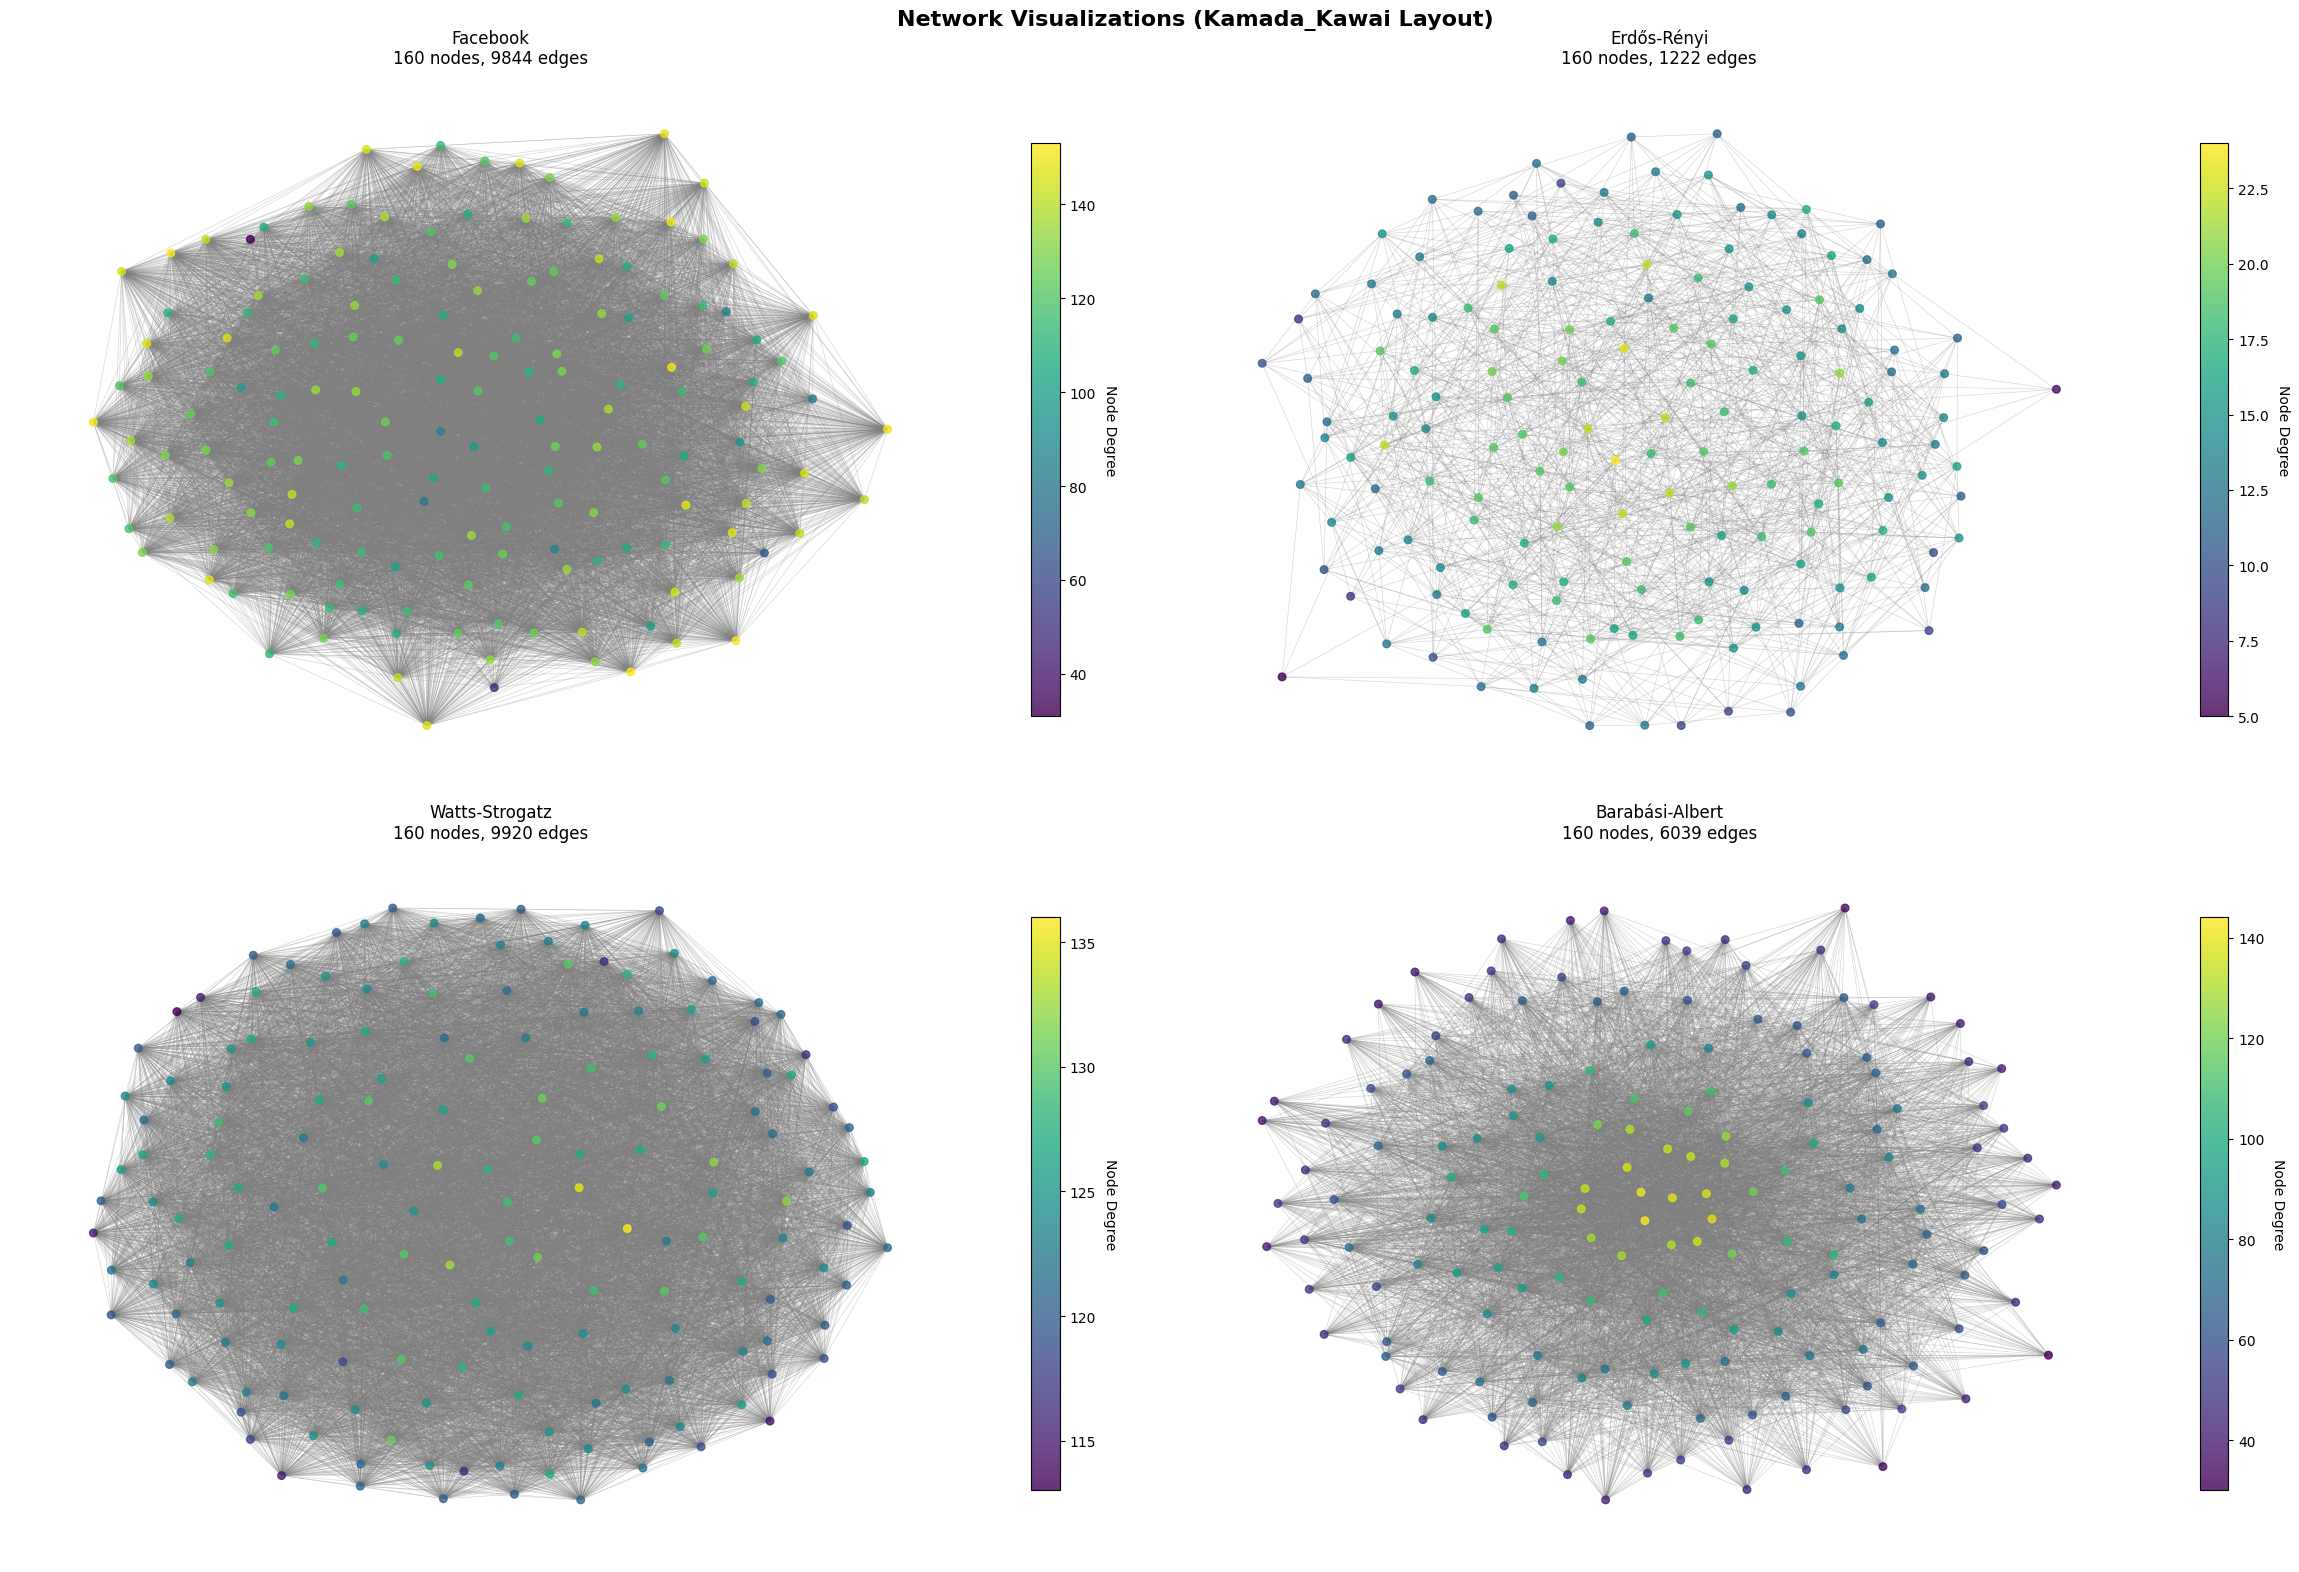

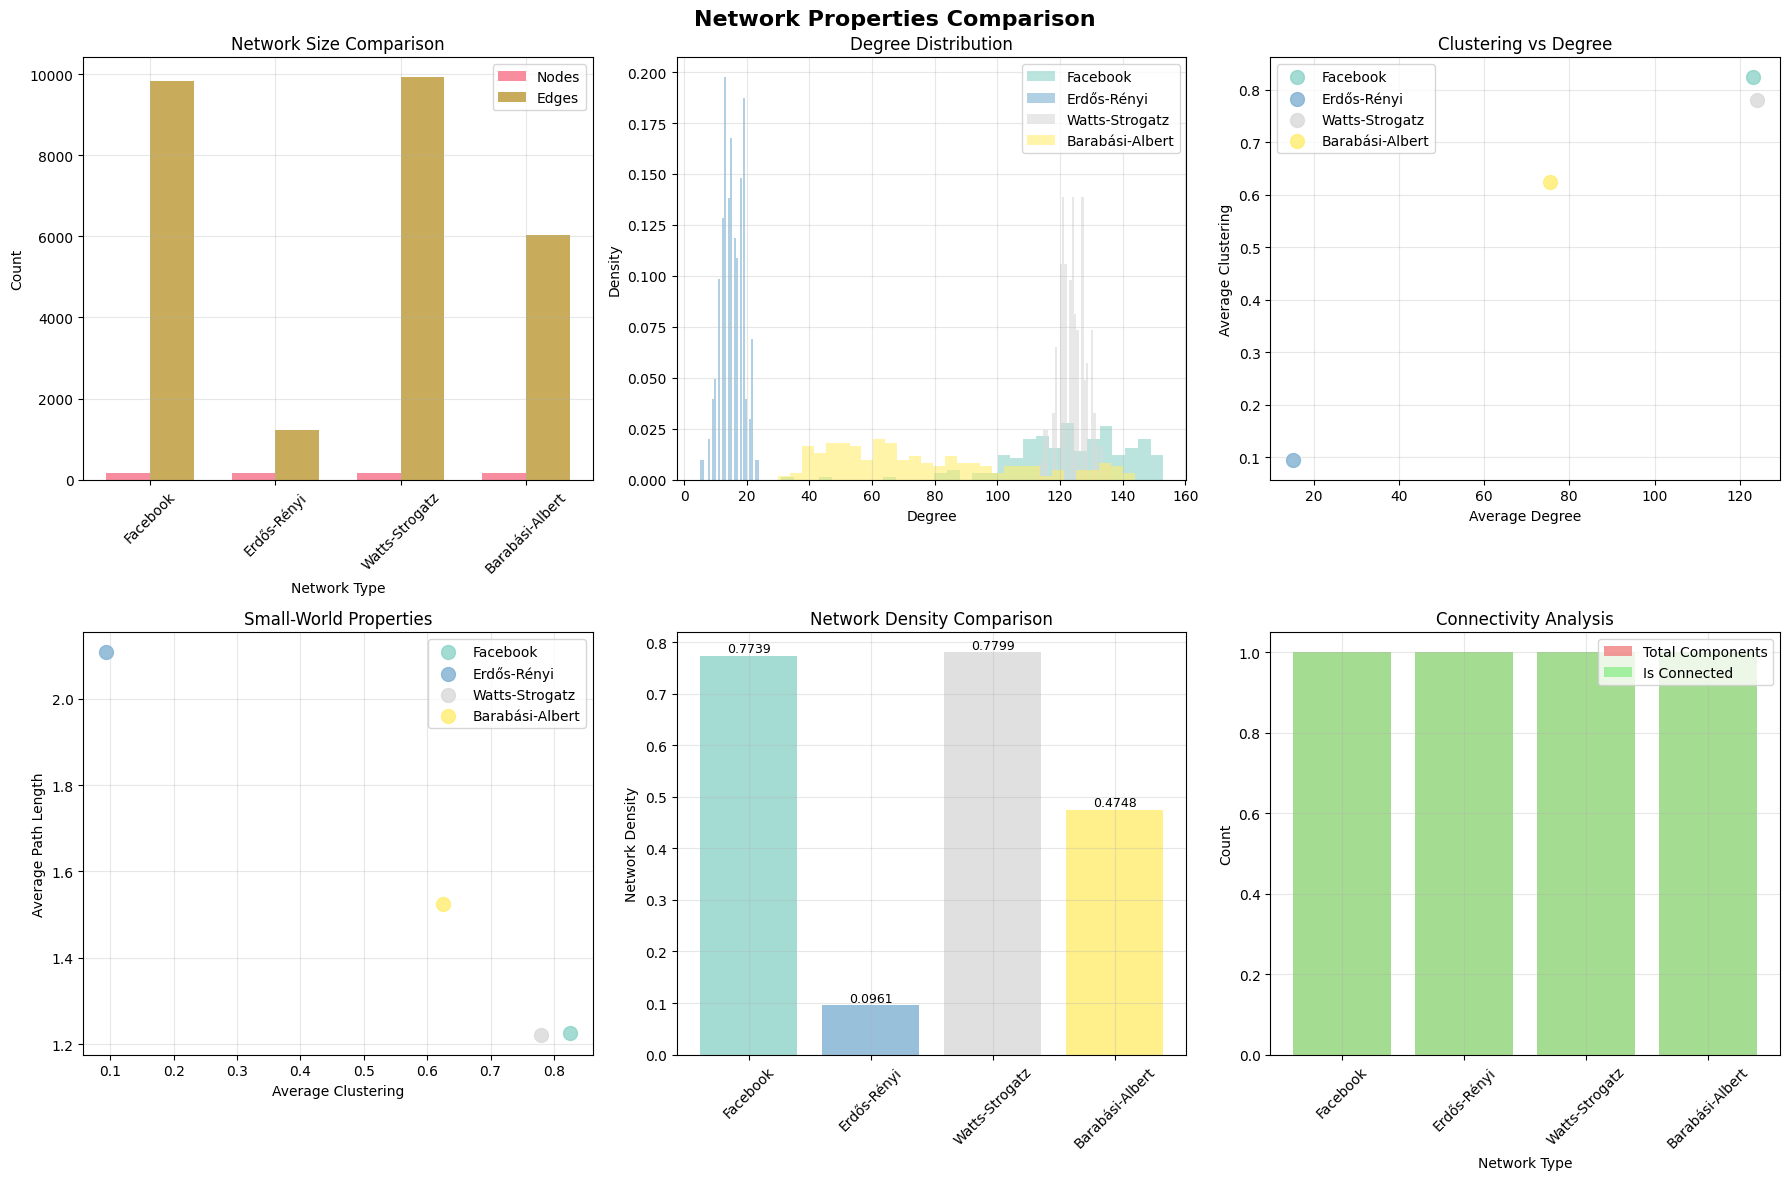

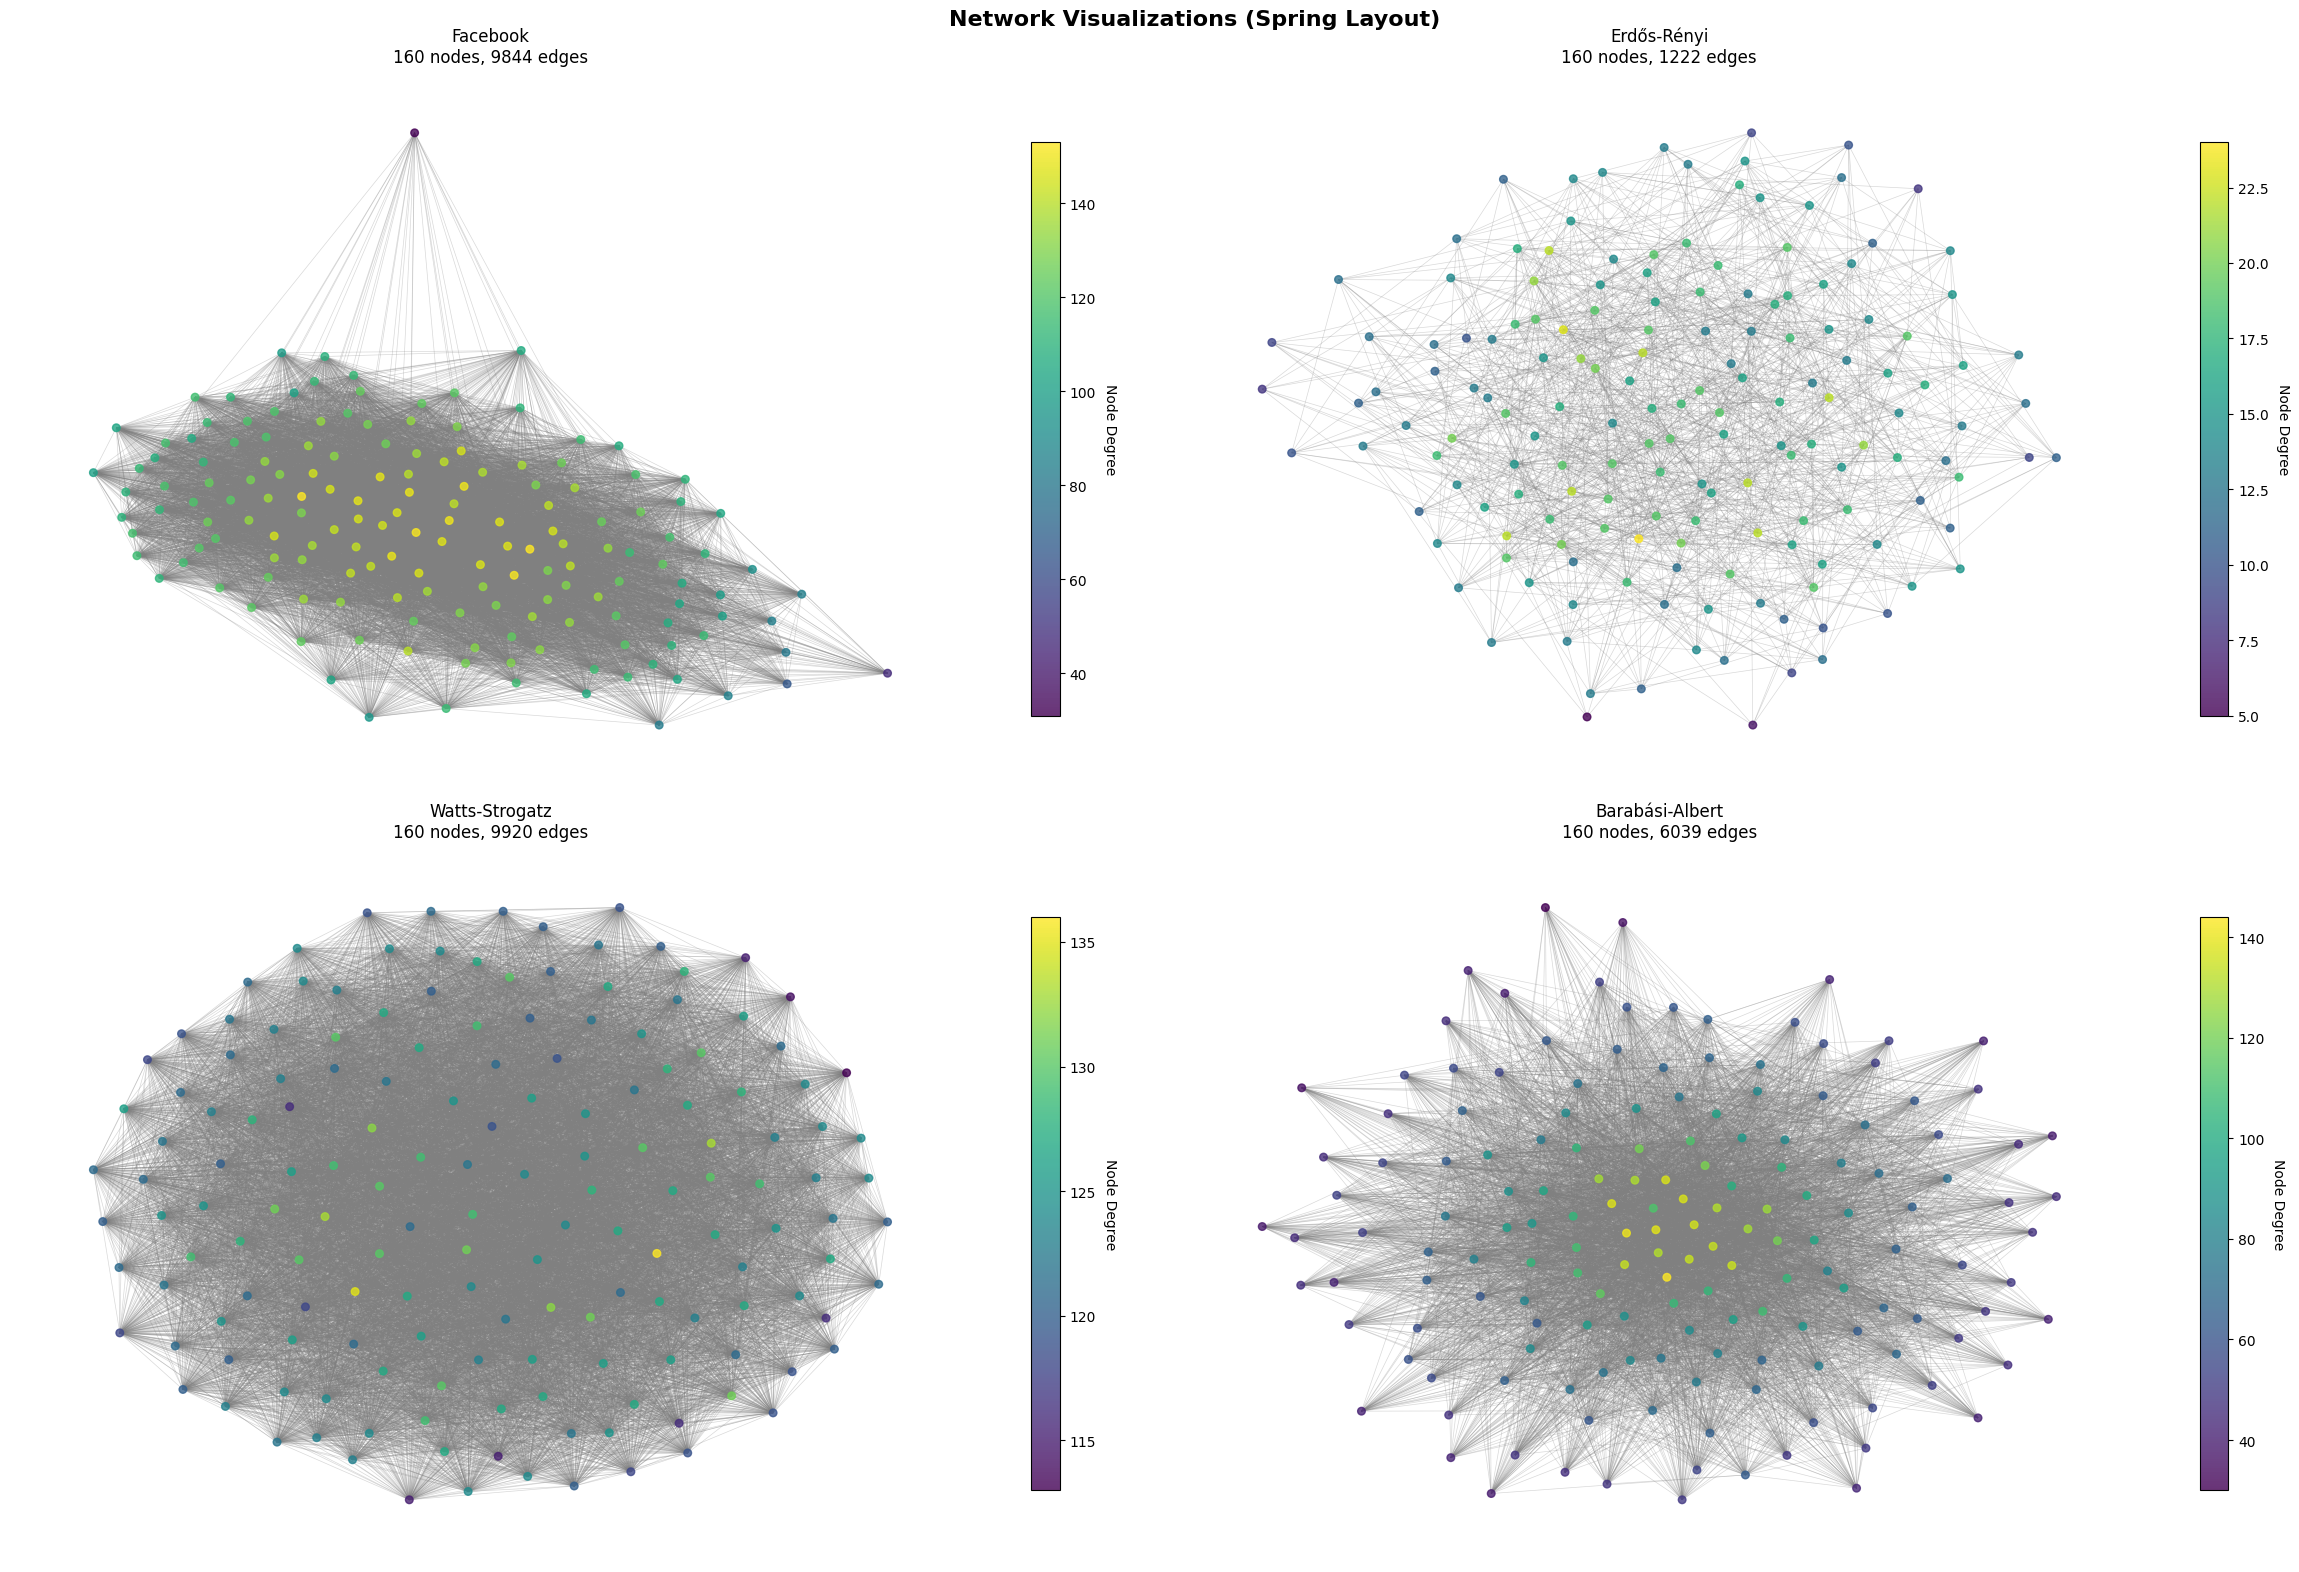

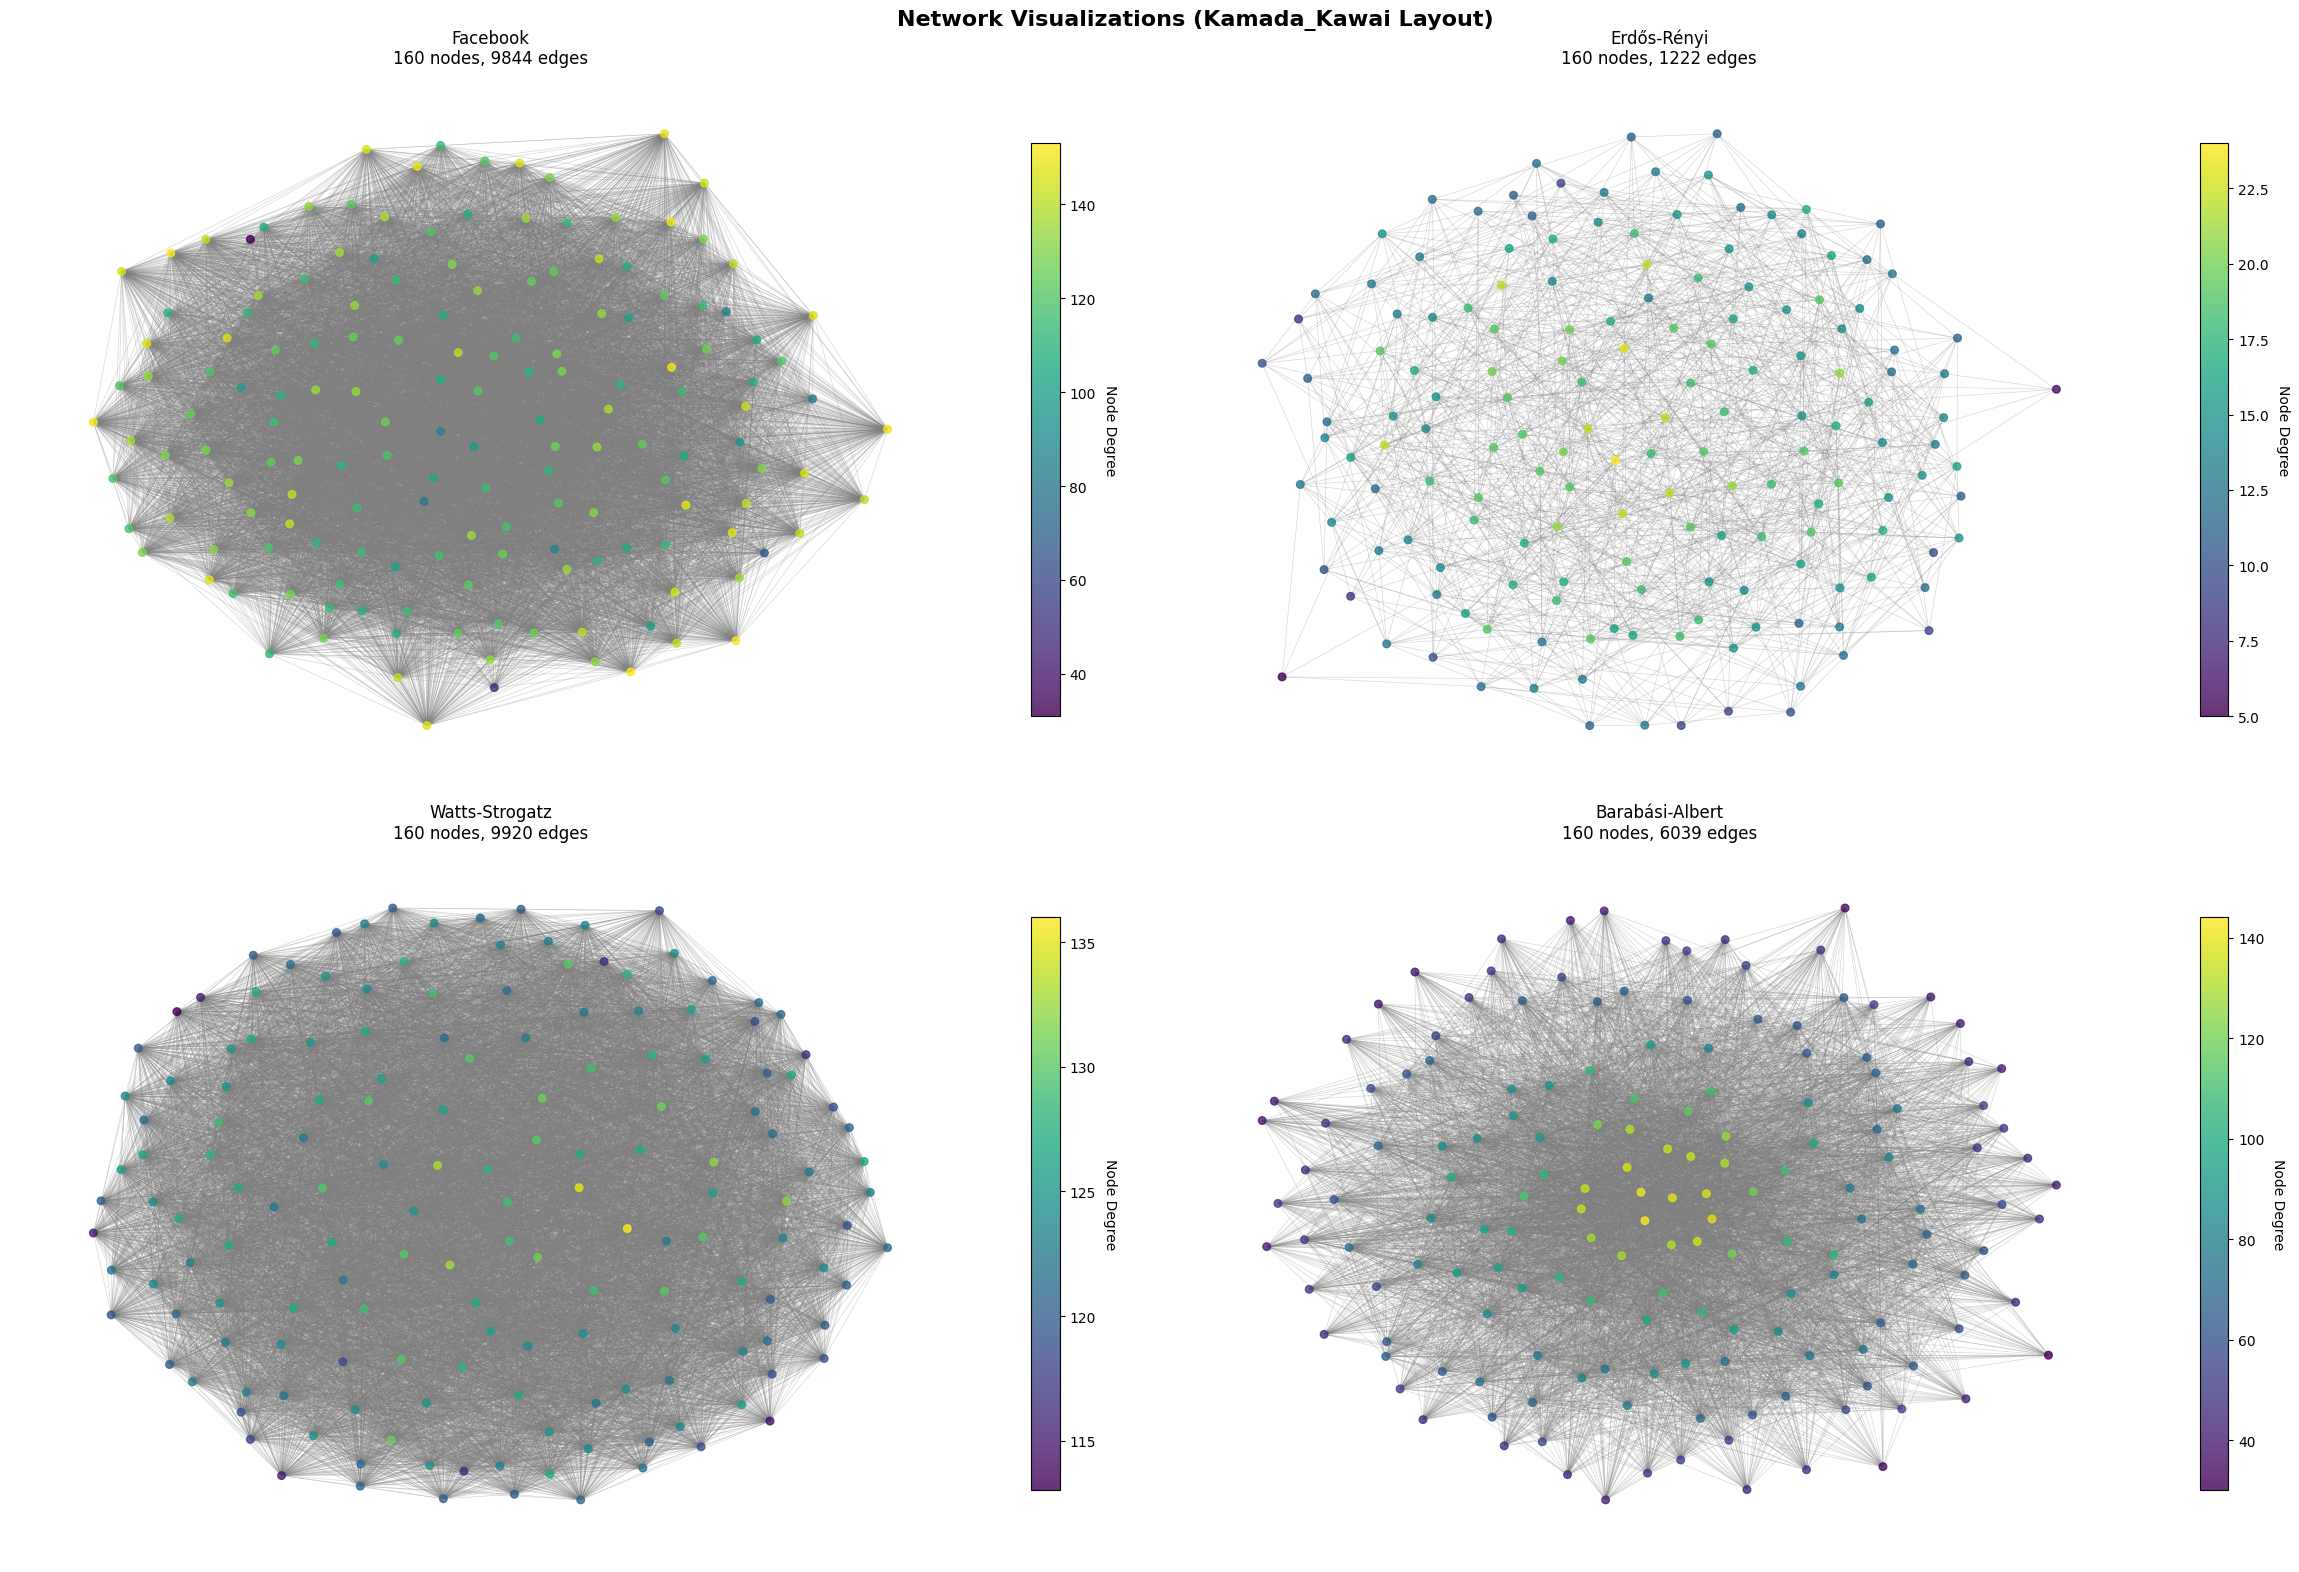

In [ ]:
# Compare with model networks

# Upload your .py file
from google.colab import files
uploaded = files.upload()

# Rename it sample data file
!mv "network_visualization_suite (2).py" network_visualization_suite.py

# Verify the rename worked
!ls

suite = NetworkVisualizationSuite()
suite.networks["Facebook"] = G

suite.generate_theoretical_networks()
suite.analyze_network_properties()
suite.print_summary_statistics()
suite.create_network_comparison_plot()
suite.visualize_networks('spring', sample_size=300)
suite.visualize_networks('kamada_kawai', sample_size=300)




In [ ]:
# Erdős–Rényi model (nx.erdos_renyi_graph), p = probability of edge
N = len(G.nodes)
p = avg_degree / (N - 1)
G_er = nx.erdos_renyi_graph(N, p)

